In [7]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
import seaborn as sns
import pywt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [8]:
# Import raw data file: "corporateCreditRatingWithFinancialRatios.csv"
from google.colab import files
uploaded = files.upload()

import io
df_raw = pd.read_csv(io.BytesIO(uploaded['corporateCreditRatingWithFinancialRatios.csv']))

Saving corporateCreditRatingWithFinancialRatios.csv to corporateCreditRatingWithFinancialRatios.csv


In [9]:
# import corporate rating conversion: "Ratings.csv"
uploaded = files.upload()
df_rating = pd.read_csv(io.BytesIO(uploaded['Ratings.csv']))

# add rating conversion to dr_raw
df = pd.merge(left=df_raw, right=df_rating, left_on="Rating",
    right_on="Rating", how="left")

# Print the shape of Dataframe and Check for Null Values
print("Dataframe Shape: ", df.shape)
print("Null Value Present: ", df.isnull().values.any())
if df.isnull().values.any() == True:
  print('The number of missing values is ', df.isnull().sum().sum())

Saving Ratings.csv to Ratings.csv
Dataframe Shape:  (7805, 26)
Null Value Present:  False


In [10]:
# Preview data
print(df.columns)

Index(['Rating Agency', 'Corporation', 'Rating', 'Rating Date', 'CIK',
       'Binary Rating', 'SIC Code', 'Sector', 'Ticker', 'Current Ratio',
       'Long-term Debt / Capital', 'Debt/Equity Ratio', 'Gross Margin',
       'Operating Margin', 'EBIT Margin', 'EBITDA Margin',
       'Pre-Tax Profit Margin', 'Net Profit Margin', 'Asset Turnover',
       'ROE - Return On Equity', 'Return On Tangible Equity',
       'ROA - Return On Assets', 'ROI - Return On Investment',
       'Operating Cash Flow Per Share', 'Free Cash Flow Per Share', 'Ranking'],
      dtype='object')


# **SVM**

In [11]:
def svm_model(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

  rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
  poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

  poly_pred = poly.predict(X_test)
  rbf_pred = rbf.predict(X_test)

  poly_accuracy = accuracy_score(y_test, poly_pred)
  poly_f1 = f1_score(y_test, poly_pred, average='weighted')
  print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
  print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

  rbf_accuracy = accuracy_score(y_test, rbf_pred)
  rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
  print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
  print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
  return [poly_accuracy*100, poly_f1*100, rbf_accuracy*100, rbf_f1*100]


In [12]:
X = df.drop(["Rating", "Ranking", "Rating Agency", "Corporation", "CIK", "SIC Code",
              "Rating Date", "Binary Rating", "Sector", "Ticker"], axis=1)
Y = df["Ranking"]
svm_model(X,Y)

Accuracy (Polynomial Kernel):  12.34
F1 (Polynomial Kernel):  3.67
Accuracy (RBF Kernel):  11.78
F1 (RBF Kernel):  2.48


[12.339880444064901, 3.671578644574586, 11.784799316823227, 2.484801078260665]

# **Random Forest**

In [13]:
def randomForest(X,Y):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

  rf = RandomForestRegressor(n_estimators = 100)
  rf.fit(X_train, y_train)
  sel = SelectFromModel(rf)
  sel.fit(X_train, y_train)

  sel.get_support()
  selected_feat= X_train.columns[(sel.get_support())]
  #pd.series(sel.estimator_,feature_importances_,.ravel()).hist()

  feature_names = X_train.columns
  rf.feature_importances_
  plt.barh(feature_names, rf.feature_importances_)
  plt.xlabel("Importance")
  print("Features with greatest importances are ", selected_feat, ".")
  return(selected_feat)


Features with greatest importances are  Index(['Current Ratio', 'Long-term Debt / Capital', 'Pre-Tax Profit Margin',
       'ROI - Return On Investment'],
      dtype='object') .


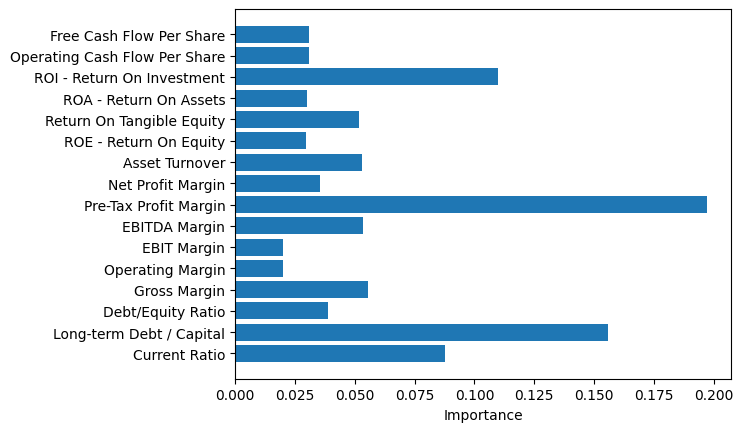

In [14]:
# Splitting to Training set and Test set
X = df.drop(["Rating", "Ranking", "Rating Agency", "Corporation", "CIK", "SIC Code",
            "Rating Date", "Binary Rating", "Sector", "Ticker"], axis=1)
Y = df["Ranking"]
selected_feat = randomForest(X,Y)


In [15]:
# Test using new X and Y
X = df[selected_feat]
Y = df["Ranking"]
svm_model(X,Y)


Accuracy (Polynomial Kernel):  12.81
F1 (Polynomial Kernel):  4.67
Accuracy (RBF Kernel):  16.78
F1 (RBF Kernel):  9.05


[12.809564474807855, 4.666885003708037, 16.78052946199829, 9.051489492566484]

Standard & Poor's Ratings Services
Accuracy (Polynomial Kernel):  11.61
F1 (Polynomial Kernel):  2.98
Accuracy (RBF Kernel):  11.26
F1 (RBF Kernel):  2.28
Features with greatest importances are  Index(['Current Ratio', 'Long-term Debt / Capital', 'Pre-Tax Profit Margin'], dtype='object') .
Accuracy (Polynomial Kernel):  10.66
F1 (Polynomial Kernel):  3.07
Accuracy (RBF Kernel):  11.26
F1 (RBF Kernel):  4.40
DBRS
Accuracy (Polynomial Kernel):  25.00
F1 (Polynomial Kernel):  25.00
Accuracy (RBF Kernel):  62.50
F1 (RBF Kernel):  55.00
Features with greatest importances are  Index(['ROE - Return On Equity', 'ROA - Return On Assets',
       'ROI - Return On Investment'],
      dtype='object') .
Accuracy (Polynomial Kernel):  12.50
F1 (Polynomial Kernel):  16.67
Accuracy (RBF Kernel):  12.50
F1 (RBF Kernel):  2.78
Moody's Investors Service
Accuracy (Polynomial Kernel):  11.61
F1 (Polynomial Kernel):  2.75
Accuracy (RBF Kernel):  11.41
F1 (RBF Kernel):  2.34
Features with greatest importances

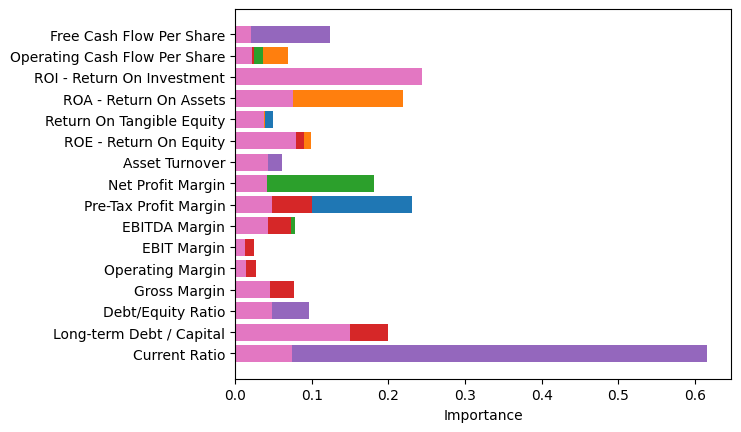

In [17]:
# Split the data by rating agencies since different agencies may have different
# rating criteria/standards
rateAge_list = df['Rating Agency'].unique()
d = dict()
accuracyPoly_list = []; F1Poly_list = []; accuracyRBF_list = []; F1RBF_list = []
r_accuracyPoly_list = []; r_F1Poly_list = []; r_accuracyRBF_list = []; r_F1RBF_list = []
selectFeat_list = []; data_list = []

for i in range(0,len(rateAge_list)):
  agency = rateAge_list[i]
  print(agency)
  df_new = df.loc[df['Rating Agency'] == agency]
  data_list.append(len(df_new))

  X = df_new.drop(["Rating", "Ranking", "Rating Agency", "Corporation", "CIK", "SIC Code",
              "Rating Date", "Binary Rating", "Sector", "Ticker"], axis=1)
  Y = df_new["Ranking"]
  [poly_accuracy, poly_f1, rbf_accuracy, rbf_f1] = svm_model(X,Y)
  accuracyPoly_list.append(poly_accuracy); F1Poly_list.append(poly_f1)
  accuracyRBF_list.append(rbf_accuracy); F1RBF_list.append(rbf_f1)

  # Random Forest
  selected_feat = randomForest(X,Y)
  selectFeat_list.append(selected_feat)
  X = df_new[selected_feat]
  Y = df_new["Ranking"]
  [poly_accuracy, poly_f1, rbf_accuracy, rbf_f1] = svm_model(X,Y)
  r_accuracyPoly_list.append(poly_accuracy); r_F1Poly_list.append(poly_f1)
  r_accuracyRBF_list.append(rbf_accuracy); r_F1RBF_list.append(rbf_f1)


In [18]:
# Print result into Excel
'''
col = ["Accuracy (Polynomial Kernel)", "F1 (Polynomial Kernel)",
       "Accuracy (RBF Kernel)", "F1 (RBF Kernel)",
       "RF: Accuracy (Polynomial Kernel)", "RF: F1 (Polynomial Kernel)",
       "RF: Accuracy (RBF Kernel)", "RF: F1 (RBF Kernel)",
       "Selected Feature"]
df_result = pd.DataFrame(columns=col)
'''
df_result = pd.DataFrame()

df_result["Agency"] = rateAge_list
df_result["No. of Samples"] = data_list
df_result["Accuracy (Polynomial Kernel)"] = accuracyPoly_list
df_result["F1 (Polynomial Kernel)"] = F1Poly_list
df_result["Accuracy (RBF Kernel)"] = accuracyRBF_list
df_result["F1 (RBF Kernel)"] = F1RBF_list
df_result["RF: Accuracy (Polynomial Kernel)"] = r_accuracyPoly_list
df_result["RF: F1 (Polynomial Kernel)"] = r_F1Poly_list
df_result["RF: Accuracy (RBF Kernel)"] = r_accuracyRBF_list
df_result["RF: F1 (RBF Kernel)"] = r_F1RBF_list
df_result["Selected Feature"] = selectFeat_list

In [19]:
import openpyxl
df_result.to_excel('result.xlsx', index=False)

# **Neural Network**

In [28]:
from sklearn.preprocessing import LabelEncoder
from scikeras.wrappers import KerasClassifier
#from keras.utils import np_utils
from keras.utils import to_categorical

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping


In [29]:
X = df.drop(["Rating", "Rating Agency", "Corporation", "CIK", "SIC Code",
              "Rating Date", "Binary Rating", "Sector", "Ticker"], axis=1)
Y = df["Rating"]
X = np.asarray(X)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
#dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y = to_categorical(encoded_Y)

model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(23, activation='softmax'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                288       
                                                                 
 dense_1 (Dense)             (None, 23)                391       
                                                                 
Total params: 679 (2.65 KB)
Trainable params: 679 (2.65 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# early stopping callback
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                                   mode='min',
                                   patience=10,
                                   restore_best_weights=True)

history = model.fit(X,
                    dummy_y,
                    callbacks=[es],
                    epochs=8000,
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

history_dict = history.history

Epoch 1/8000
625/625 [==============================] - 2s 2ms/step - loss: 14.8425 - accuracy: 0.0922 - val_loss: 11.1412 - val_accuracy: 0.0871
Epoch 2/8000
625/625 [==============================] - 1s 2ms/step - loss: 6.2764 - accuracy: 0.1036 - val_loss: 8.6629 - val_accuracy: 0.0756
Epoch 3/8000
625/625 [==============================] - 3s 5ms/step - loss: 5.0465 - accuracy: 0.1103 - val_loss: 7.9037 - val_accuracy: 0.0910
Epoch 4/8000
625/625 [==============================] - 3s 5ms/step - loss: 4.5981 - accuracy: 0.1409 - val_loss: 7.7655 - val_accuracy: 0.1224
Epoch 5/8000
625/625 [==============================] - 3s 4ms/step - loss: 4.2339 - accuracy: 0.1658 - val_loss: 6.9447 - val_accuracy: 0.1403
Epoch 6/8000
625/625 [==============================] - 2s 2ms/step - loss: 3.9874 - accuracy: 0.1800 - val_loss: 6.3837 - val_accuracy: 0.1224
Epoch 7/8000
625/625 [==============================] - 1s 2ms/step - loss: 3.7956 - accuracy: 0.1890 - val_loss: 6.3074 - val_accurac

In [31]:
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)


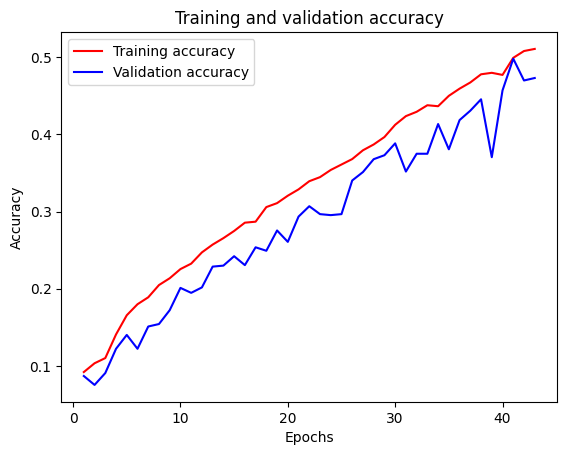

In [32]:
# plot
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X)
#print(preds[0])
#print(np.sum(preds[0]))

matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))

print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1), zero_division=0))


  1/244 [..............................] - ETA: 9s

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


244/244 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.51      0.90      0.65       836
           1       0.55      0.30      0.39       478
           2       0.53      0.03      0.05       722
           3       0.81      0.46      0.59       185
           4       0.00      0.00      0.00        73
           5       0.63      0.68      0.65       254
           6       0.57      0.98      0.72        90
           7       0.29      0.01      0.01       310
           8       0.23      0.66      0.34       422
           9       0.37      0.31      0.34       288
          10       0.16      0.03      0.05       453
          11       0.35      0.51      0.41       545
          12       0.18      0.12      0.14       427
          13       0.44      0.63      0.52       910
          14       0.43      0.72      0.54       846
          15       0.22      0.03      0.05       705
          16       0.00   